### 3. Feature Selection- Select Features Using Information Gain (mutual information) For Classification in ML

### Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

`I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits`

### Youtube Videos
Entropy: [Link](https://www.youtube.com/watch?v=1IQOtJ4NI_0)

Information Gain: [Link](https://www.youtube.com/watch?v=FuTRucXB9rA)

Gini Impurity: [Link](https://www.youtube.com/watch?v=5aIFgrrTqOw)

Statistical test: [Link](https://www.youtube.com/watch?v=4-rxTA_5_xA)

In [2]:
import pandas as pd

# Wine Dataset
df = pd.read_csv(r"https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [10]:
# Seperate Dependent and Independent Features
X = df.drop('Wine',axis = 1)
y = df['Wine']

### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.3, random_state = 0)

In [12]:
X_train.shape, X_test.shape

((124, 13), (54, 13))

### Feature Selection with mutual_info_classification

In [14]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train,y_train)
mutual_info

array([0.42598354, 0.30047993, 0.13709634, 0.25637574, 0.19572937,
       0.47343567, 0.70563391, 0.09580565, 0.26799772, 0.62366517,
       0.54939429, 0.55508985, 0.52990119])

These are our 13 features 
### Note:
- One property of `mutual_info_classif` is that, we never get negative value
- We either get zero or we get the positive number within 1
- The feature whose value is higher (means whose value is more closer to 1) is more important to the target variable 

In the above output 0.70563391 has the highest value, We have to find out which feature is this

In [19]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending= False)

Flavanoids              0.705634
Color.int               0.623665
OD                      0.555090
Hue                     0.549394
Proline                 0.529901
Phenols                 0.473436
Alcohol                 0.425984
Malic.acid              0.300480
Proanth                 0.267998
Acl                     0.256376
Mg                      0.195729
Ash                     0.137096
Nonflavanoid.phenols    0.095806
dtype: float64

<AxesSubplot:>

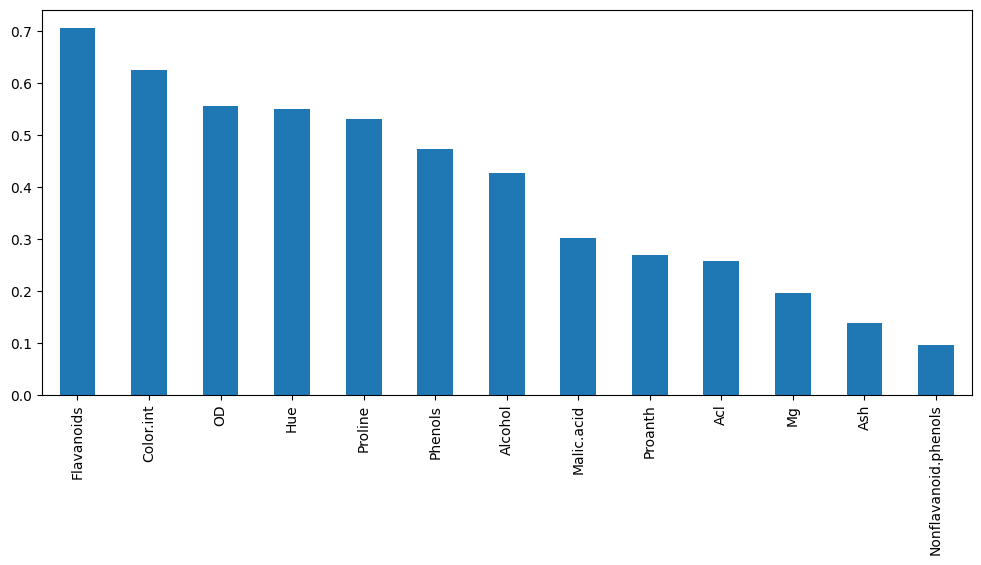

In [23]:
mutual_info.sort_values(ascending= False).plot.bar(figsize=(12,5))

### From These 13 feature, we will take which are the top 10 most important features for this particular problem statement

In [26]:
from sklearn.feature_selection import SelectKBest

In [30]:
# No we will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k = 5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

- These are our top 5 most important features
- Now we can use these features to train our machine learning models 
- Do hyperparameter tunning 
- Get Accuracy

### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.

# Comparion of Univariate And Mutual Information

Comparison of F-test and mutual information https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py